# ¿El planeta se calienta?  80 años de cambio en la temperatura global


### Análisis exploratorio y tratamiento de datos

Importación de librerías necesarias

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import geopandas as gpd
import folium
import dash
from dash import dcc, html, Input, Output
import numpy as np

Lectura de los datasets

In [2]:
df_temperature = pd.read_csv(r'average-monthly-surface-temperature.csv')
df_continent = pd.read_csv(r'continents2.csv')

In [3]:
df_temperature.head()

,Entity,Code,year,Day,Average surface temperature,Average surface temperature.1
0,Afghanistan,AFG,1940,1940-01-15,-2.032494,11.327695
1,Afghanistan,AFG,1940,1940-02-15,-0.733503,11.327695
2,Afghanistan,AFG,1940,1940-03-15,1.999134,11.327695
3,Afghanistan,AFG,1940,1940-04-15,10.199754,11.327695
4,Afghanistan,AFG,1940,1940-05-15,17.942135,11.327695


In [4]:
df_continent.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


Eliminamos columnas que no utilizaremos: name, alpha-2, iso_3166-2, region-code, sub-region-code, intermediate-region-code

In [5]:
df_continent.drop(['name','alpha-2','iso_3166-2','iso_3166-2', 'sub-region-code', 'intermediate-region-code', 'intermediate-region', 'country-code', 'region-code'],
  axis='columns', inplace=True)
df_continent.head()

,alpha-3,region,sub-region
0,AFG,Asia,Southern Asia
1,ALA,Europe,Northern Europe
2,ALB,Europe,Southern Europe
3,DZA,Africa,Northern Africa
4,ASM,Oceania,Polynesia


In [6]:
df_merge = df_temperature.merge(df_continent, 
                      how='left', 
                      left_on='Code', 
                      right_on='alpha-3', 
                      suffixes=('_temp', '_cont'))
df_merge

,Entity,Code,year,Day,Average surface temperature,Average surface temperature.1,alpha-3,region,sub-region
0,Afghanistan,AFG,1940,1940-01-15,-2.032494,11.327695,AFG,Asia,Southern Asia
1,Afghanistan,AFG,1940,1940-02-15,-0.733503,11.327695,AFG,Asia,Southern Asia
2,Afghanistan,AFG,1940,1940-03-15,1.999134,11.327695,AFG,Asia,Southern Asia
3,Afghanistan,AFG,1940,1940-04-15,10.199754,11.327695,AFG,Asia,Southern Asia
4,Afghanistan,AFG,1940,1940-05-15,17.942135,11.327695,AFG,Asia,Southern Asia
...,...,...,...,...,...,...,...,...,...
198895,Zimbabwe,ZWE,2024,2024-08-15,20.559408,22.921250,ZWE,Africa,Sub-Saharan Africa
198896,Zimbabwe,ZWE,2024,2024-09-15,23.642931,22.921250,ZWE,Africa,Sub-Saharan Africa
198897,Zimbabwe,ZWE,2024,2024-10-15,24.407030,22.921250,ZWE,Africa,Sub-Saharan Africa
198898,Zimbabwe,ZWE,2024,2024-11-15,25.672321,22.921250,ZWE,Africa,Sub-Saharan Africa


Comprobar la existencia de valores nulos y tratarlos

In [7]:
print(df_merge.isna().sum())
df_merge_nulls = df_merge[df_merge.isna().any(axis=1)]
paises_con_nulos = df_merge_nulls['Entity'].dropna().unique()
print("Los países con datos nulos son:", ", ".join(paises_con_nulos))
df_merge_nulls

Entity                              0
Code                                0
year                                0
Day                                 0
Average surface temperature         0
Average surface temperature.1       0
alpha-3                          2040
region                           2040
sub-region                       2040
dtype: int64
Los países con datos nulos son: Kosovo, World


,Entity,Code,year,Day,Average surface temperature,Average surface temperature.1,alpha-3,region,sub-region
99960,Kosovo,OWID_KOS,1940,1940-01-15,-7.012903,7.452425,NaN,NaN,NaN
99961,Kosovo,OWID_KOS,1940,1940-02-15,-1.466986,7.452425,NaN,NaN,NaN
99962,Kosovo,OWID_KOS,1940,1940-03-15,0.732306,7.452425,NaN,NaN,NaN
99963,Kosovo,OWID_KOS,1940,1940-04-15,8.351257,7.452425,NaN,NaN,NaN
99964,Kosovo,OWID_KOS,1940,1940-05-15,12.231471,7.452425,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
195835,World,OWID_WRL,2024,2024-08-15,16.822422,15.090968,NaN,NaN,NaN
195836,World,OWID_WRL,2024,2024-09-15,16.174273,15.090968,NaN,NaN,NaN
195837,World,OWID_WRL,2024,2024-10-15,15.245267,15.090968,NaN,NaN,NaN
195838,World,OWID_WRL,2024,2024-11-15,14.098477,15.090968,NaN,NaN,NaN


Los datos nulos corresponden a Kosovo y a World, en el caso de World se eliminará del estudio y se analizarán los datos a nivel mundial posteriormente.
En el caso de Kosovo se modificaran los valores nulos segun información real del país y se actualizará el código para que se ajuste según el estándar ISO 3166-1 alpha-3 (código de tres letras) es "XKX".

In [8]:
row_world = df_merge.loc[df_merge['Entity'] == 'World'].index
df_merge.drop(row_world, axis=0, inplace=True)
row_kosovo = df_merge.loc[df_merge['Entity'] == 'Kosovo'].index
df_merge.loc[row_kosovo, 'Code'] = 'XKX'
df_merge.loc[row_kosovo, 'region'] = 'Europe'
df_merge.loc[row_kosovo, 'sub-region'] = 'Southern Europe'
df_merge[df_merge['Entity'] == 'Kosovo']

,Entity,Code,year,Day,Average surface temperature,Average surface temperature.1,alpha-3,region,sub-region
99960,Kosovo,XKX,1940,1940-01-15,-7.012903,7.452425,NaN,Europe,Southern Europe
99961,Kosovo,XKX,1940,1940-02-15,-1.466986,7.452425,NaN,Europe,Southern Europe
99962,Kosovo,XKX,1940,1940-03-15,0.732306,7.452425,NaN,Europe,Southern Europe
99963,Kosovo,XKX,1940,1940-04-15,8.351257,7.452425,NaN,Europe,Southern Europe
99964,Kosovo,XKX,1940,1940-05-15,12.231471,7.452425,NaN,Europe,Southern Europe
...,...,...,...,...,...,...,...,...,...
100975,Kosovo,XKX,2024,2024-08-15,23.763653,12.345814,NaN,Europe,Southern Europe
100976,Kosovo,XKX,2024,2024-09-15,17.061443,12.345814,NaN,Europe,Southern Europe
100977,Kosovo,XKX,2024,2024-10-15,12.335925,12.345814,NaN,Europe,Southern Europe
100978,Kosovo,XKX,2024,2024-11-15,3.705254,12.345814,NaN,Europe,Southern Europe


Se actualizan los nombres de las series a fin de que sean mas entendibles, se eliminará alpha-3, Day y 'AVG_monthly_surface_temperature' y se agregarán 2 nuevas filas: mes y década. De esta forma tendremos datos mas organizados para analisis futuros.

In [9]:
df_merge['Day'] = pd.to_datetime(df_merge['Day'])
df_merge.insert(3, 'Month', df_merge['Day'].dt.month_name())

df_merge.drop(['alpha-3', 'Day', 'Average surface temperature.1'], axis='columns', inplace=True)
df_temp_country = df_merge.rename(columns={
    'Average surface temperature': 'AVG_daily_surface_temperature',
    'sub-region': 'sub_region',
    'year': 'Year',
    'region': 'Region'
})
df_temp_country.insert(4, 'Decade', (df_temp_country['Year'] // 10) * 10)
df_temp_country

,Entity,Code,Year,Month,Decade,AVG_daily_surface_temperature,Region,sub_region
0,Afghanistan,AFG,1940,January,1940,-2.032494,Asia,Southern Asia
1,Afghanistan,AFG,1940,February,1940,-0.733503,Asia,Southern Asia
2,Afghanistan,AFG,1940,March,1940,1.999134,Asia,Southern Asia
3,Afghanistan,AFG,1940,April,1940,10.199754,Asia,Southern Asia
4,Afghanistan,AFG,1940,May,1940,17.942135,Asia,Southern Asia
...,...,...,...,...,...,...,...,...
198895,Zimbabwe,ZWE,2024,August,2020,20.559408,Africa,Sub-Saharan Africa
198896,Zimbabwe,ZWE,2024,September,2020,23.642931,Africa,Sub-Saharan Africa
198897,Zimbabwe,ZWE,2024,October,2020,24.407030,Africa,Sub-Saharan Africa
198898,Zimbabwe,ZWE,2024,November,2020,25.672321,Africa,Sub-Saharan Africa


### Desarrollo de Infografías y Gráfico Interactivo

🌡️ Mapa de Calor por mes y década

Un mapa de calor que muestra cómo ha cambiado la temperatura promedio en cada mes a lo largo de las décadas (1940-2024). Mostrar cómo los inviernos se han vuelto menos fríos y los veranos más calurosos.

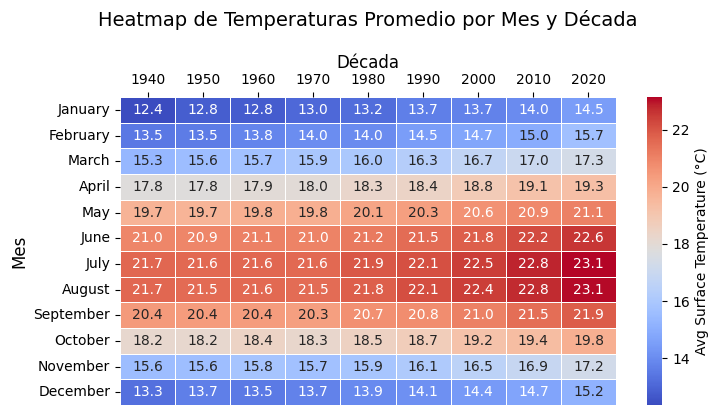

In [10]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_temp_country['Month'] = pd.Categorical(df_temp_country['Month'], categories=month_order, ordered=True)
heatmap_data = df_temp_country.pivot_table(index='Month', columns='Decade', values='AVG_daily_surface_temperature', aggfunc='mean', observed=False)
plt.figure(figsize=(8, 4))
ax = sns.heatmap(
    heatmap_data,
    cmap="coolwarm",  
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    cbar_kws={'label': 'Avg Surface Temperature (°C)'},
)
ax.xaxis.tick_top()  
ax.xaxis.set_label_position('top')  
plt.title("Heatmap de Temperaturas Promedio por Mes y Década", fontsize=14, pad=20)
plt.xlabel("Década", fontsize=12)
plt.ylabel("Mes", fontsize=12)
plt.show()

 🏜️ El Mundo Más Cálido: Comparación 1940 vs. 2024

Una malla de 2 gráficos de línea para analisis del comportamiento por regiones.
1. Aumento de temperatura por region
2. Impacto del aumento de la temperatura por Region (aumento cuantificado en 80 annos)

C:\Users\krlos\AppData\Local\Temp\ipykernel_32076\2638597751.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




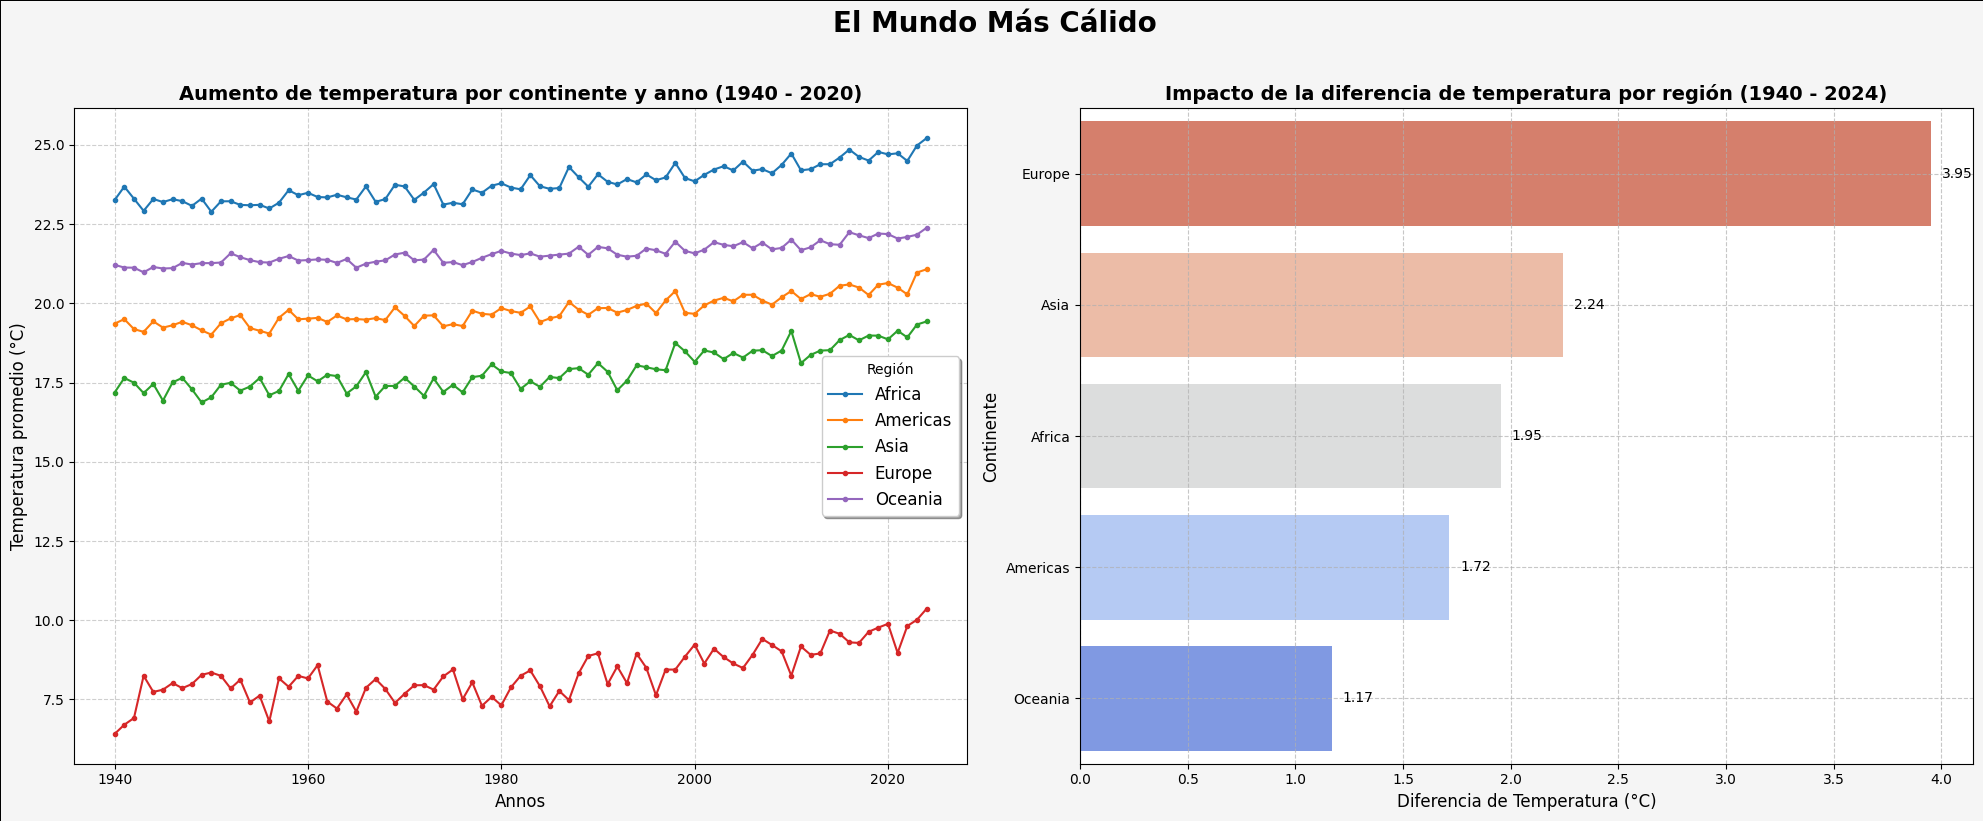

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('El Mundo Más Cálido', fontsize=20, fontweight='bold', y=1.02)
fig.patch.set_facecolor('#f5f5f5')

# Gráfico 1: Aumento de temperatura por región
df_temp_region = df_temp_country.groupby(['Region', 'Year'])['AVG_daily_surface_temperature'].mean().unstack()
df_temp_region.T.plot(ax=axes[0], marker = '.', linestyle='-')
axes[0].set_title('Aumento de temperatura por continente y anno (1940 - 2020)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Temperatura promedio (°C)', fontsize=12)
axes[0].set_xlabel('Annos', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].legend(title='Región', fontsize=12, shadow=True)

# Gráfico 2: Impacto del aumento de la temperatura por Region
temp_1940 = df_temp_country[df_temp_country['Year'] == 1940].groupby('Region', observed=False)['AVG_daily_surface_temperature'].mean()
temp_2024 = df_temp_country[df_temp_country['Year'] == 2024].groupby('Region', observed=False)['AVG_daily_surface_temperature'].mean()
temp_diff = temp_2024 - temp_1940
temp_diff_sorted = temp_diff.sort_values(ascending=False)

seq_palette = sns.color_palette("coolwarm_r", 5)
sns.barplot(x=temp_diff_sorted.values, y=temp_diff_sorted.index, palette=seq_palette, ax=axes[1])

for index, value in enumerate(temp_diff_sorted.values):
    axes[1].text(value + 0.05, index, f'{value:.2f}', va='center', fontsize=10)
axes[1].set_title('Impacto de la diferencia de temperatura por región (1940 - 2024)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Diferencia de Temperatura (°C)', fontsize=12)
axes[1].set_ylabel('Continente', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.7)

fig.subplots_adjust(hspace=0.3, wspace=0.3)
fig.patch.set_edgecolor('black')
fig.patch.set_linewidth(0.5)
fig.tight_layout()

plt.show()

📈 3 Ideas de Gráficos Interactivos
🌍 Mapa Interactivo de Temperaturas por País

Un mapa del mundo donde cada país cambie de color según su temperatura promedio mensual. Posibilidad de seleccionar el año y el mes para ver la evolución en el tiempo. Tooltip al pasar el mouse sobre un país para mostrar su temperatura exacta.

In [12]:
# 📍 Cargar el mapa del mundo con los códigos de países
world = gpd.read_file("https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson")

# 📍 Filtrar los datos por año y mes seleccionados
year_selected = 2023
month_selected = 'January'

df_filtered = df_temp_country[(df_temp_country['Year'] == year_selected) & 
                              (df_temp_country['Month'] == month_selected)]

# 📍 Unir los datos de temperatura con el mapa mundial usando el código de país
world = world.merge(df_filtered, left_on="ADM0_A3", right_on="Code", how="left")

# 📍 Crear el mapa base
m = folium.Map(location=[20, 0], zoom_start=2)

folium.Choropleth(
    geo_data=world,
    name="Temperatura Promedio",
    data=world,
    columns=["ADM0_A3", "AVG_daily_surface_temperature"],
    key_on="feature.properties.ADM0_A3",
    fill_color="YlGnBu",  # ✅ ColorBrewer válido
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Temperatura Promedio (°C)"
).add_to(m)

folium.GeoJson(
    world,
    tooltip=folium.GeoJsonTooltip(
        fields=["NAME", "AVG_daily_surface_temperature"],
        aliases=["País", "Temperatura (°C)"],
        localize=True
    )
).add_to(m)

m

📈 Evolución Mensual de la Temperatura por País

Un gráfico de líneas donde el usuario pueda seleccionar un país y ver cómo han cambiado sus temperaturas mes a mes desde 1940 hasta 2024.
Permitir comparar dos países simultáneamente. Slider para moverse por décadas y ver las tendencias.

In [13]:
world_temperature = df_merge_nulls[df_merge_nulls['Entity'] == 'World'].copy()
world_temperature['Day'] = pd.to_datetime(world_temperature['Day'])
world_temperature.insert(3, 'Month', world_temperature['Day'].dt.month_name())

world_temperature.drop(['alpha-3', 'Day', 'region', 'sub-region'], axis='columns', inplace=True)
world_temperature = world_temperature.rename(columns={
    'Average surface temperature': 'AVG_daily_surface_temperature',
    'year': 'Year',
})
world_temperature.insert(4, 'Decade', (world_temperature['Year'] // 10) * 10)
world_temperature


,Entity,Code,Year,Month,Decade,AVG_daily_surface_temperature,Average surface temperature.1
194820,World,OWID_WRL,1940,January,1940,11.496665,13.685313
194821,World,OWID_WRL,1940,February,1940,11.872166,13.685313
194822,World,OWID_WRL,1940,March,1940,12.524002,13.685313
194823,World,OWID_WRL,1940,April,1940,13.756892,13.685313
194824,World,OWID_WRL,1940,May,1940,14.745552,13.685313
...,...,...,...,...,...,...,...
195835,World,OWID_WRL,2024,August,2020,16.822422,15.090968
195836,World,OWID_WRL,2024,September,2020,16.174273,15.090968
195837,World,OWID_WRL,2024,October,2020,15.245267,15.090968
195838,World,OWID_WRL,2024,November,2020,14.098477,15.090968


In [14]:
app = dash.Dash(__name__)
app.layout = html.Div([
    html.H1("Comparación de Temperaturas Globales por Año"),
    
    html.Label("Selecciona el primer año:"),
    dcc.Slider(
        id='year1-slider',
        min=1940,
        max=2024,
        step=1,
        marks={year: str(year) for year in range(1940, 2025, 10)},
        value=1950
    ),

    html.Label("Selecciona el segundo año:"),
    dcc.Slider(
        id='year2-slider',
        min=1940,
        max=2024,
        step=1,
        marks={year: str(year) for year in range(1940, 2025, 10)},
        value=2020
    ),

    dcc.Graph(id='temperature-comparison')
])

@app.callback(
    Output('temperature-comparison', 'figure'),
    [Input('year1-slider', 'value'),
     Input('year2-slider', 'value')]
)
def update_graph(selected_year1, selected_year2):
    df_filtered = world_temperature[world_temperature['Year'].isin([selected_year1, selected_year2])]

    fig = px.line(df_filtered, 
                  x='Month', 
                  y='AVG_daily_surface_temperature', 
                  color='Year',
                  markers=True,
                  labels={'AVG_daily_surface_temperature': 'Temperatura Promedio (°C)'},
                  title=f'Comparación de Temperaturas: {selected_year1} vs {selected_year2}')

    return fig
if __name__ == '__main__':
    app.run_server(debug=True)

📅 Eventos climáticos relevantes 

Una línea de tiempo con cambios en la temperatura a lo largo de las décadas y eventos climáticos clave.

In [15]:
(
    ggplot(casos_trend_pob)  
    + aes(x = 'fecha', 
          y = 'ia14d')   
    #+ geom_rect(data=df, mapping=aes(xmin=df.x1, xmax=df.x2, ymin=0, ymax=80000, fill=df.r), color="black", alpha=0.5)
    + geom_smooth(method = "lowess", 
                  span = 0.05)

    #+ geom_hline(yintercept = 500, size = 0.5, linetype = 'dotted')
    + geom_hline(yintercept = 500, size = 0.5, linetype = 'dotted')
    + geom_vline(xintercept = '2020-03-15', size = 0.5, linetype = 'dotted')
    + geom_vline(xintercept = '2020-06-25', size = 0.5, linetype = 'dotted')
    + geom_vline(xintercept = '2020-12-10', size = 0.5, linetype = 'dotted')
    + geom_vline(xintercept = '2021-03-17', size = 0.5, linetype = 'dotted')
    + geom_vline(xintercept = '2021-06-23', size = 0.5, linetype = 'dotted')
    + geom_vline(xintercept = '2021-10-14', size = 0.5, linetype = 'dotted')
    + theme(figure_size=(8, 4),
            axis_text_x = element_text(angle = 45,
                                      hjust = 1,
                                      size = 8))
    + annotate('text', x='2020-02-10', y=600, label='Riesgo muy alto', size=9, color='red')
    + annotate('text', x='2020-05-08', y=3000, label='Primera\nola', size=9, color='blue')
    + annotate('text', x='2020-09-18', y=3000, label='Segunda\nola', size=9, color='blue')
    + annotate('text', x='2021-01-27', y=3000, label='Tercera\nola', size=9, color='blue')
    + annotate('text', x='2021-05-05', y=3000, label='Cuarta\nola', size=9, color='blue')
    + annotate('text', x='2021-08-15', y=3000, label='Quinta\nola', size=9, color='blue')
    + annotate('text', x='2022-03-10', y=3000, label='Sexta\nola', size=9, color='blue')
    + labs(title='Evolución IA a 14d por 100.000 hab.', x='Fecha', y='IA14d')
)

NameError: name 'ggplot' is not defined